#Intro to Machine learning - Hand in assignment 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn

## 1) Create function and plot it on a 3D plot

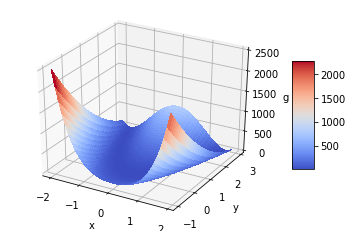

In [ ]:
def h(X):
  return 100*(X[1] - X[0]**2)**2 + (1-X[0])**2

fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(-2, 2, 0.1)
y = np.arange(-1, 3, 0.1)
x, y = np.meshgrid(x, y)

surf = ax.plot_surface(x, y, h([x, y]), cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5, anchor = (1,0.5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('g')
plt.show()

## 2) Gradient descent




In [ ]:
eta = 0.001

X_optimal = [1, 1]

def grad_h(X):
  a = np.array([0.0,0.0])
  a[0] = -200*(X[1] - X[0]**2)*(2*X[0]) - 2*(1-X[0])
  a[1] = 200*(X[1] - X[0]**2)
  return a

def dist(v1, v2):
      return np.linalg.norm(np.array(v1)-np.array(v2))

def gradient_descent(eta, max_iter=100, lim = None):
  X_initial = [-1, 1]
  X_optimal = [1, 1]

  X_visited = np.zeros((2, max_iter))
  Z_visited = []
  r_convergence = np.zeros(max_iter - 1)
  
  X = X_initial

  for i in range(max_iter):
    X_visited[:,i] = X
    Z_visited.append(h(X))
    if i < max_iter - 1:
      r_convergence[i] = dist(X - eta*grad_h(X) ,X_optimal)/dist(X, X_optimal)
    X[0] -= eta*grad_h(X)[0]
    X[1] -= eta*grad_h(X)[1]
    
    #if |x_n - x*| <= accuracy -> we converged
    if lim is not None:
      if h(X) <= lim:
        print("Reached g(x) <= {} after {} iterations".format(lim, i))
        break

  return X_visited, Z_visited, r_convergence

  

Plot (x,y) against h(x,y)

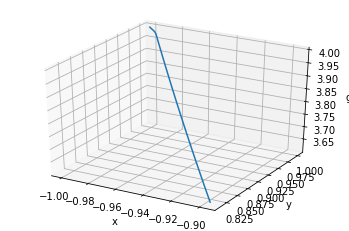

In [ ]:
X, z_grad, r = gradient_descent(eta)

fig = plt.figure()
ax = plt.axes(projection='3d')

x_grad = X[0,:]
y_grad = X[1,:]
x_mesh_grad, y_mesh_grad = np.meshgrid(X[0,:], X[1,:])

#surf = ax.plot_surface(x_mesh, y_mesh, h([x_mesh,y_mesh]), cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot(x_grad, y_grad, z_grad)
#fig.colorbar(surf, shrink=0.5, aspect=5, anchor = (1,0.5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('g')
plt.show()

## 3) Find a good $\eta$
### a. Choose a good $\eta_{\text{good}}$


In [ ]:
eta_good = 0.0059
iterations = 10000

X_good, z_eta_good, r = gradient_descent(eta_good, iterations)
print("Reached function value {} after {} iterations".format(z_eta_good[-1], iterations))

Reached function value 4.930380657631324e-32 after 10000 iterations


## b. Choose $\eta_\text{smaller}$ and $\eta_\text{larger}$

In [ ]:
eta_smaller = 0.005
eta_larger = 0.0062

X_smaller, z_eta_smaller, r = gradient_descent(eta_smaller, iterations)
X_larger, z_eta_larger, r = gradient_descent(eta_larger, iterations)


In [ ]:
print("Function value reached after {} iterations for eta_good: {}".format(iterations, z_eta_good[-1]))
print("Function value reached after {} iterations for eta_smaller: {}".format(iterations, z_eta_smaller[-1]))
print("Function value reached after {} iterations for eta_larger: {}".format(iterations, z_eta_larger[-1]))


Function value reached after 10000 iterations for eta_good: 4.930380657631324e-32
Function value reached after 10000 iterations for eta_smaller: 3.0814879110195774e-29
Function value reached after 10000 iterations for eta_larger: 7.888609052210118e-29


## 4) Convergence plots

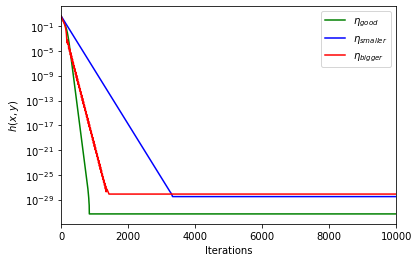

In [ ]:
plt.plot(range(iterations), z_eta_good, 'g', label="$\eta_{good}$")
plt.plot(range(iterations), z_eta_smaller, 'b', label="$\eta_{smaller}$")
plt.plot(range(iterations), z_eta_larger, 'r', label="$\eta_{bigger}$")
plt.xlabel("Iterations")
plt.ylabel("$h(x,y)$")
plt.yscale('log')
plt.xlim([0,10000])
plt.legend()
plt.show()

We observe much swifter convergence for the correct eta compared to the smaller and larger values, which is of course expected.

## 5) Plots on top of a contour plot

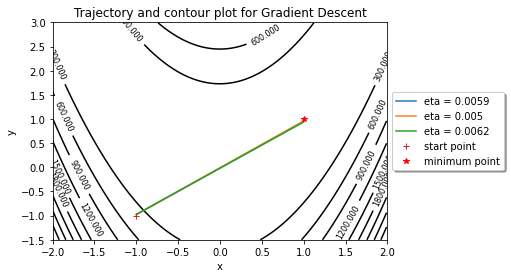

In [ ]:
fig, ax= plt.subplots()

Xplot = np.arange(-2, 2, 0.01)
Yplot = np.arange(-1.5, 3, 0.01)
Xplot, Yplot = np.meshgrid(Xplot, Yplot)
Zplot= h([Xplot,Yplot])
plt.xlim([-2, 2])
plt.ylim([-1.5, 3])

np.random.seed(1)

X_set = [X_good,X_smaller,X_larger]
etavalues = [eta_good,eta_smaller,eta_larger]

for etavalues,X_vals in zip(etavalues,X_set):
  XYtrajectory = np.array(X_vals)
  ax.plot(XYtrajectory[:,0], XYtrajectory[:,1], label="eta = " + str(round(etavalues, 5)))

ax.plot(-1,-1,'+', label="start point") #start point
ax.plot(1,1,'*', label="minimum point", color="red") #end point

contours = plt.contour(Xplot, Yplot, Zplot,10, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.ylabel("y")
plt.xlabel("x")

plt.title("Trajectory and contour plot for Gradient Descent")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True)
plt.show()


## 6) Newton's Method

In [ ]:
def H_inv(X):
  H = np.array([[1200*(X[0]**2)-400*X[1]+2,-400*X[0]],[-400*X[0],200]])
  Hinv = np.linalg.inv(H)
  return Hinv

In [ ]:
def newton_algorithm(max_iter = 100):
   
    X = np.array([0.0,0.0])
    X_opt = np.array([3.0, -2.0])
    
    X_visited = np.zeros((2, max_iter))
    distances = np.zeros(max_iter)
    fun_values = np.zeros(max_iter)
    
    X_visited[:,0] = X
    fun_values[0] = h(X)
    distances[0] = dist(X, X_opt)
  
    for it in range(1, max_iter):
        
        X  = X - H_inv(X)@grad_h(X)
        
        X_visited[:,it] = X
        fun_values[it] = h(X)
        distances[it] = dist(X,X_opt)
        
    return(X_visited, fun_values, distances)  

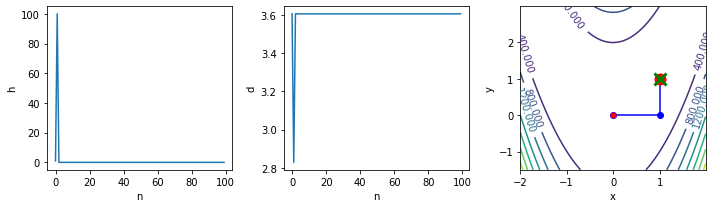

In [ ]:
X_visited_Newton, fun_values_Newton, distances_Newton = newton_algorithm() 

Xplot = np.arange(-2, 2, 0.01)
Yplot = np.arange(-1.5, 3, 0.01)
Xplot, Yplot = np.meshgrid(Xplot, Yplot)
Zplot= h([Xplot,Yplot])

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(fun_values_Newton) 
plt.xlabel('n')
plt.ylabel('h')

plt.subplot(1,3,2)
plt.plot(distances_Newton) 
plt.xlabel('n')
plt.ylabel('d')

plt.subplot(1,3,3) 
cont = plt.contour(Xplot,Yplot,Zplot)

plt.plot(X_visited_Newton[0,:], X_visited_Newton[1,:],'-ob')
# intial point red dot
plt.plot(X_visited_Newton[0,0], X_visited_Newton[1,0],'or', ms=5)
# end point: big red dot
plt.plot(X_visited_Newton[0,-1], X_visited_Newton[1,-1],'or',mew=2, ms=10)
# target: big green cross
plt.plot(X_optimal[0], X_optimal[1],'xg',mew=3, ms=12)

plt.clabel(cont)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()

plt.show()

We see that using Newton's method, the algorithm essentially converges to the optimal point in only 2 iterations, which is great performance.

## 7) Summary

We were able to find a value for 𝜂 ( 0.0059) that starts to converges towards a minimum in a reasonably small number of iterations. We found that even small changes in 𝜂 could make fairly massive changes to how long it takes for the function to converge. The convergence rate depends on a factor of 𝜂𝜆i, the smaller the the product, the slower the convergence. For this particular problem, the 𝜂 is small as are both 𝜆’s, this makes process slower.

Newton’s method comes from a second order Taylor expansions and so is better equipped to deal with a higher order functions such as the one in this assignment. It finds a minimum after only 2 iterations, clearly much faster than the gradient descent. However in this case, the Hessian could be calculated by hand and was easily invertable by numpy.linalg. 
